# Derin Öğrenme İçin Aktivasyon Fonksiyonlarının Karşılaştırılması


---


Bunun için MNIST veri seti için basit bir Evrişimli Sİnir ağı modeli tercih edilmiştir. 


*   Sigmoid Fonksiyonu
*   Hiperbolik Tanjant
*   ReLU Fonksiyonu
*   Leaky-ReLU Fonksiyonu
*   Swish Fonksiyonu

Aktivasyon fonksiyonlarının aynı veri seti ve derin öğrenme modeli için elde ettikleri doğrulama başarısı ve yitimi, eğitim başarısı ve yitimi hesaplanmaktadır. Histogramlar ile karşılaştırılması sunulmaktadır.


---


### Detaylar için lütfen blog yazısını inceleyiniz!

### Anlatım için videoyu takip edebilirsiniz!


---






In [ ]:
!kill -9 -1

### Google Colab Kimlik Doğrulama İşlemi

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


### Kullanılan donanımın bilgilerini görmek için bu kısmı çalıştırabilirsiniz!
Biz bu çalışmayı GPU (Tesla K80) üzerinde yapacağız.

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10748532786679279165, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14146140179304964059
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7166002930754219577
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11338832282
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17429685086479276043
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

### Kütüphanelerin kurulması ve gerekli importların yapılması adımı

In [ ]:
!pip install q keras==2.2.4

     |████████████████████████████████| 312 kB 5.3 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.2.4 which is incompatible.


In [ ]:
!pip install q tensorflow-gpu==1.14

     |████████████████████████████████| 377.1 MB 9.7 kB/s 


In [ ]:
from __future__ import print_function
import keras
#from tensorflow import keras 
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D


from keras import backend as K

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Veri Setinin İndirilmesi

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Verilerden bir kısım örneğin görselleştirilmesi
Bu adımı yapmak zorunda değiliz. Yeniden boyutlandırma veriden bir kısmının ekrana yazdırılması hakkında fikir sehibi olmuş oluyoruz.

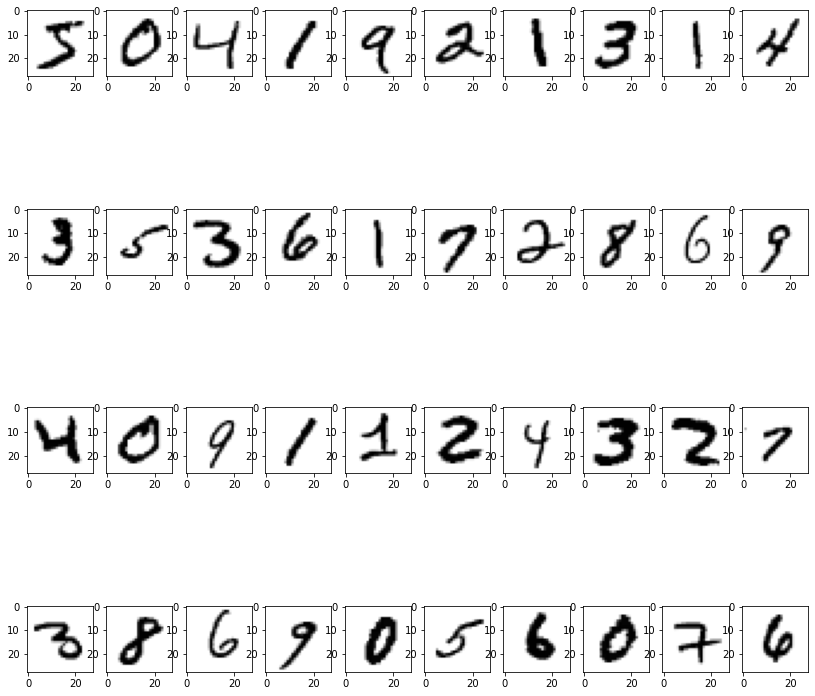

In [ ]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i],cmap=plt.cm.binary) #cmap='gray'
plt.show()

### Yapılandırma Ayarları

In [ ]:
batch_size = 128 # Küme Boyutu
num_classes = 10 # Sınıf Sayısı
epochs = 20 # Eğitimin epoch sayısı
w_l2 = 1e-5 # Başlangıç

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [ ]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# sınıf vektörlerini ikili sınıf matrislerine dönüştürmek
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Sigmoid Fonksiyonu 

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
___________________

### Modelin Eğitilm ve Test Sonuçları 


In [ ]:
hist_sigmoid=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 295us/step - loss: 0.5557 - acc: 0.8614 - val_loss: 0.1449 - val_acc: 0.9698
Epoch 2/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.2016 - acc: 0.9505 - val_loss: 0.0795 - val_acc: 0.9817
Epoch 3/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.1423 - acc: 0.9634 - val_loss: 0.0677 - val_acc: 0.9833
Epoch 4/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.1190 - acc: 0.9692 - val_loss: 0.0609 - val_acc: 0.9857
Epoch 5/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.1032 - acc: 0.9744 - val_loss: 0.0817 - val_acc: 0.9792
Epoch 6/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0959 - acc: 0.9765 - val_loss: 0.0625 - val_acc: 0.9842
Epoch 7/20
60000/60000

### Hiperbolik Tanjant Fonksiyonu

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
__________

### Modelin Eğitilm ve Test Sonuçları 

In [ ]:
hist_tanh=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 222us/step - loss: 0.1852 - acc: 0.9458 - val_loss: 0.0762 - val_acc: 0.9769
Epoch 2/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0828 - acc: 0.9775 - val_loss: 0.0564 - val_acc: 0.9838
Epoch 3/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0672 - acc: 0.9818 - val_loss: 0.0547 - val_acc: 0.9849
Epoch 4/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0612 - acc: 0.9834 - val_loss: 0.0561 - val_acc: 0.9845
Epoch 5/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0563 - acc: 0.9853 - val_loss: 0.0650 - val_acc: 0.9818
Epoch 6/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0544 - acc: 0.9863 - val_loss: 0.0534 - val_acc: 0.9857
Epoch 7/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0524 - acc: 0.9874 - val_loss: 0.

### ReLU Fonksiyonu

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
__________

### Modelin Eğitilm ve Test Sonuçları 


In [ ]:
hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.1801 - acc: 0.9515 - val_loss: 0.0636 - val_acc: 0.9807
Epoch 2/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0797 - acc: 0.9793 - val_loss: 0.0482 - val_acc: 0.9875
Epoch 3/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0658 - acc: 0.9829 - val_loss: 0.0438 - val_acc: 0.9881
Epoch 4/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0563 - acc: 0.9859 - val_loss: 0.0451 - val_acc: 0.9894
Epoch 5/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0529 - acc: 0.9874 - val_loss: 0.0466 - val_acc: 0.9886
Epoch 6/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0486 - acc: 0.9886 - val_loss: 0.0442 - val_acc: 0.9891
Epoch 7/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0450 - acc: 0.9904 - val_loss: 0.

### Leaky (Sızıntı) ReLU Fonksiyonu
Bu fonksiyon keras içinde [advanced activation function](https://keras.io/layers/advanced-activations/) olarak tanımlıdır bu yüzen bu fonksiyonu import edip model içinde kullanmamız gerekir.

In [ ]:
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.001))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
dense_7 (Dense)              (None, 24, 24, 64)        4160      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 24, 24, 64)        0         
__________

### Modelin Eğitilm ve Test Sonuçları 


In [ ]:
hist_LeakyReLU=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.1680 - acc: 0.9518 - val_loss: 0.0579 - val_acc: 0.9835
Epoch 2/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.0803 - acc: 0.9779 - val_loss: 0.0416 - val_acc: 0.9875
Epoch 3/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.0648 - acc: 0.9830 - val_loss: 0.0525 - val_acc: 0.9853
Epoch 4/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.0587 - acc: 0.9845 - val_loss: 0.0724 - val_acc: 0.9798
Epoch 5/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.0523 - acc: 0.9867 - val_loss: 0.0364 - val_acc: 0.9908
Epoch 6/20
60000/60000 [==============================] - 15s 258us/step - loss: 0.0506 - acc: 0.9874 - val_loss: 0.0497 - val_acc: 0.9886
Epoch 7/20
60000/60000 [==============================] - 16s 259us/step - loss: 0.0489 - acc: 0.9883 - val_loss: 0.

### Swish Aktivasyon Fonksiyonunun Tanımlanması

In [ ]:
def swish(x):
    return x * K.sigmoid(x)
    # return x * (1/(1 + K.exp(-x)))

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_11 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
__________

### Modelin Eğitilm ve Test Sonuçları 
Histogram tanımlaması

In [ ]:
hist_swish=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.0183 - acc: 0.9990 - val_loss: 0.0368 - val_acc: 0.9923
Epoch 2/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.0182 - acc: 0.9988 - val_loss: 0.0376 - val_acc: 0.9919
Epoch 3/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.0176 - acc: 0.9989 - val_loss: 0.0389 - val_acc: 0.9927
Epoch 4/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.0172 - acc: 0.9989 - val_loss: 0.0394 - val_acc: 0.9921
Epoch 5/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.0167 - acc: 0.9991 - val_loss: 0.0384 - val_acc: 0.9927
Epoch 6/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.0166 - acc: 0.9989 - val_loss: 0.0378 - val_acc: 0.9923
Epoch 7/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.0154 - acc: 0.9993 - val_loss: 0.

## Kaydedilen sonuçların çizilmesi için plot fonksiyonunun tanımlanması

In [ ]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'acc': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['Sigmoid', 'tanh', 'ReLU', 'Leaky_ReLU', 'Swish'], loc=loc)  

    plt.show()

In [ ]:
hists = [hist_sigmoid, hist_tanh, hist_relu, hist_LeakyReLU, hist_swish]

## SONUÇLARIN KARŞILAŞTIRILMASI

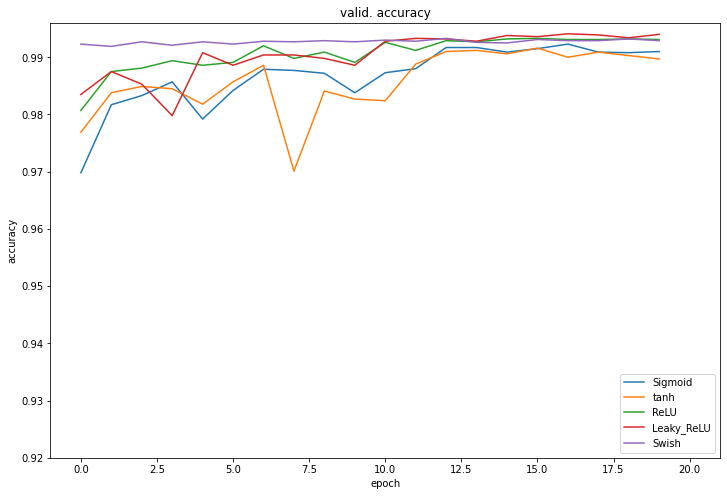

In [ ]:
plot_history(hists, attribute='val_acc',axis=(-1,21,0.92,0.9960), loc='lower right')

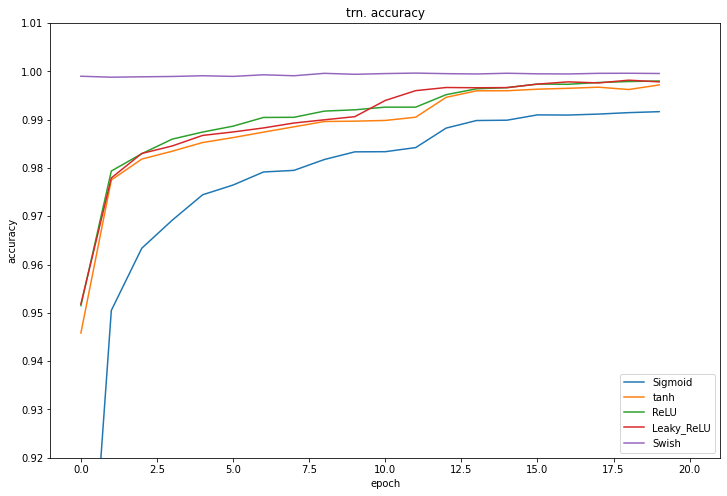

In [ ]:
plot_history(hists, attribute='acc', axis=(-1,21,0.92,1.01), loc='lower right')

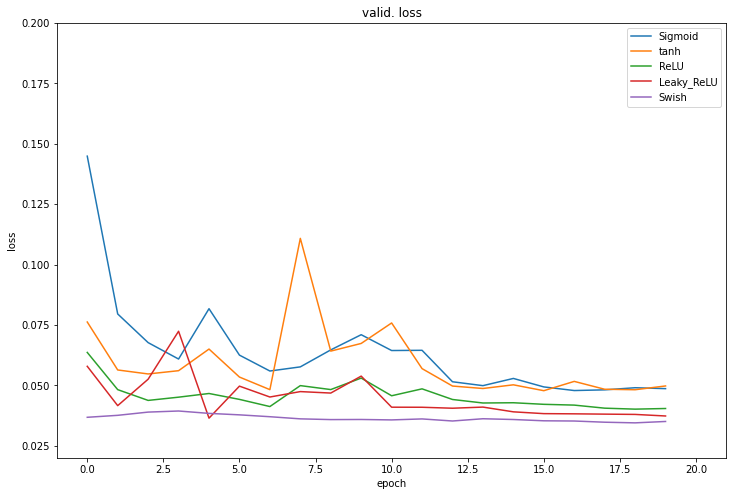

In [ ]:
plot_history(hists, attribute='val_loss', axis=(-1,21,0.02,0.20), loc='upper right')

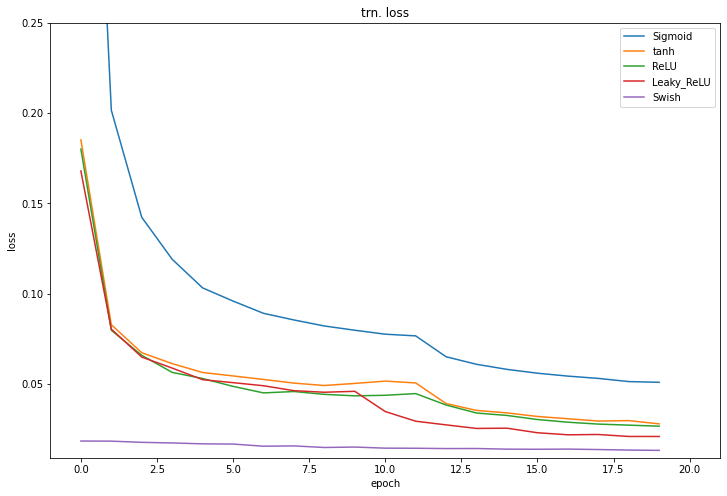

In [ ]:
plot_history(hists, attribute='loss', axis=(-1,21,0.009,0.25), loc='upper right')